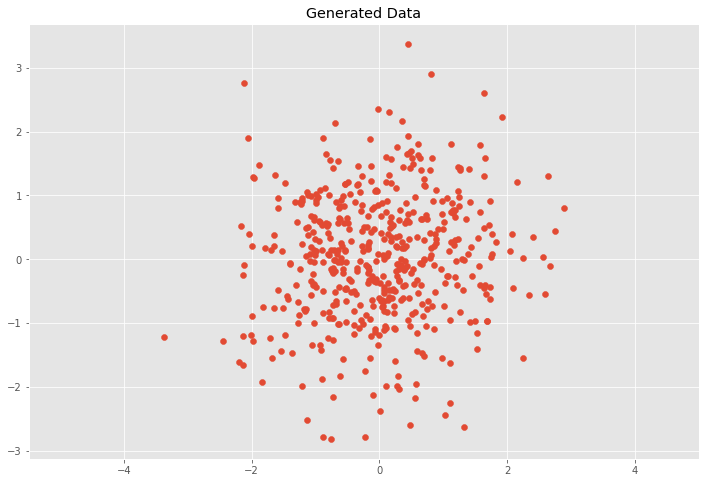

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

In [10]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[1.02520522, 0.09516979],
       [0.09516979, 0.97925404]])

array([[ 0.50235056,  0.2265041 ],
       [ 0.2265041 , 11.3201767 ]])

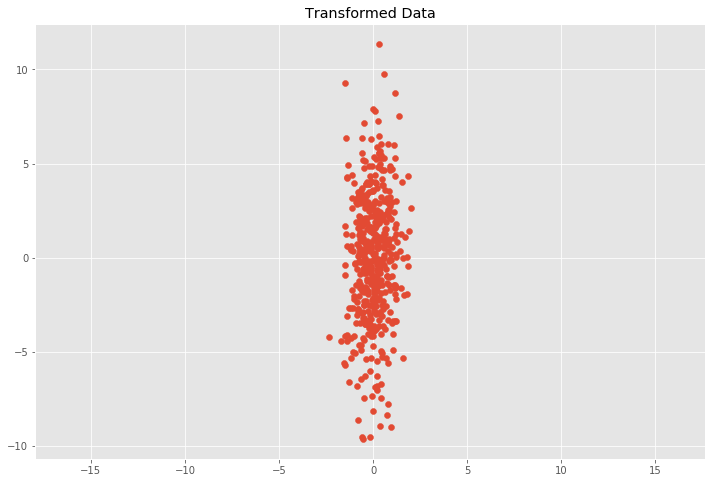

In [11]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

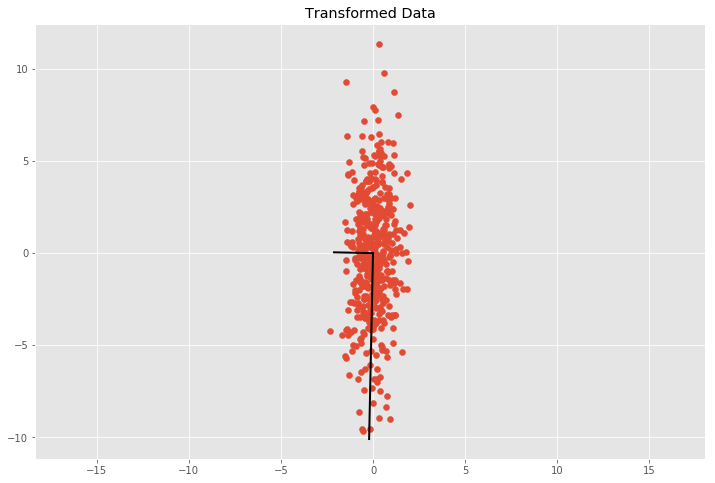

In [12]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])
for e, v in zip(eVe, eVa.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-', lw=2)
plt.title('Transformed Data')
plt.axis('equal');